# Сборный проект - 1. Выявление закономерностей, определяющих успешность компьютерной игры.

Цель проекта - выявить определяющие успешность игры закономерности, а также выбрать потенциально популярный продукт, чтобы в дальнейшем спланировать рекламные кампании.

## Предобработка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
data = pd.read_csv('/datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [3]:
#приведём названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#проверим на явные дубликаты
data.duplicated().sum()

0

In [5]:
#удалим пропуски в столбцах 'name', 'year_of_release' и 'genre', т.к. их небольшое количество
#относительно всего датафрейма
data.dropna(subset=['name', 'year_of_release', 'genre'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [6]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Предполагаем, что 'tbd' - это "Подлежит уточнению", т.е. достоверной информации об оценке пользователей пока нет. Заменим эти значения пустыми строками.

In [7]:
data.loc[data['user_score']=='tbd', 'user_score'] = np.nan
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [8]:
#Столбец с суммарными продажами во всех регионах
data['sales_all'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_all
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [9]:
#Приведём данные в столбце 'years_of_release' к типу int
data['year_of_release'] = data['year_of_release'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           9768 non-null   object 
 11  sales_all        16444 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 1.6+ MB


Пропуски в остальных столбцах пока оставим без изменений, чтобы не потерять большое количество данных. Создадим в дальнейшем отдельные датасеты, необходимые для анализа этих столбцов.

Поменяем тип данных на float в user_score. Заполним пропуски в rating нейтральным значением, чтоб игры без рейтинга вошли в график портрета пользователя отдельного региона

In [10]:
try:
    data['user_score'] = data['user_score'].astype(float)
except:
    pass
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  sales_all        16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


In [11]:
data['rating'] = data['rating'].fillna('NoNe')

## Исследовательский анализ данных

### Сколько игр выпускалось в разные годы

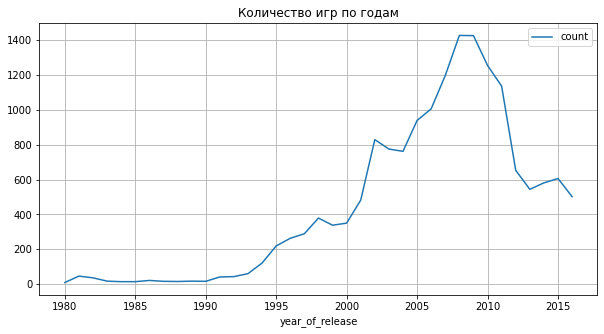

In [12]:
years = data.groupby(['year_of_release']).agg(count=('year_of_release', 'count'))
years.plot(grid=True, title=('Количество игр по годам'), figsize=(10,5));

На графике видно, что до 2009 года был относительно плавный рост количества игр, в 2009 и 2012 годах были резкие падения выпуска игр, затем колебания не такие резкие.

### Как менялись проджи по платформам

In [13]:
platforms = data.groupby(['platform']).agg({'sales_all':'sum'})
platforms.sort_values(by='sales_all', ascending=False)

,sales_all
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Построим графики зависимости числа продаж по годам для шести платформ с наибольшими суммарными продажами.

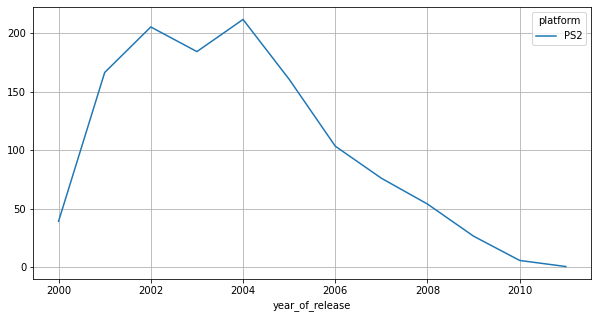

In [14]:
data.query('platform=="PS2"').pivot_table(index='year_of_release',\
    columns='platform', values='sales_all', aggfunc='sum').plot(grid=True, figsize=(10,5));

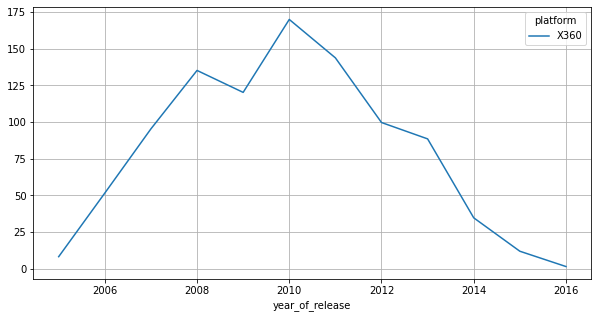

In [15]:
data.query('platform=="X360"').pivot_table(index='year_of_release',\
    columns='platform', values='sales_all', aggfunc='sum').plot(grid=True, figsize=(10,5));

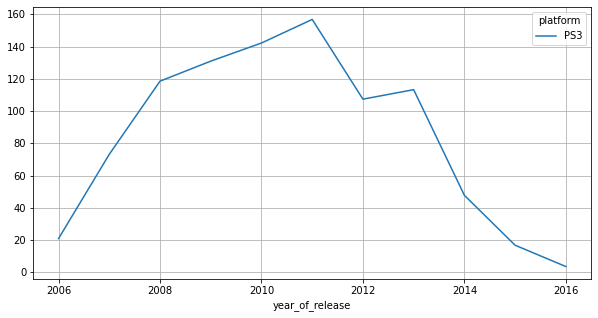

In [16]:
data.query('platform=="PS3"').pivot_table(index='year_of_release',\
    columns='platform', values='sales_all', aggfunc='sum').plot(grid=True, figsize=(10,5));

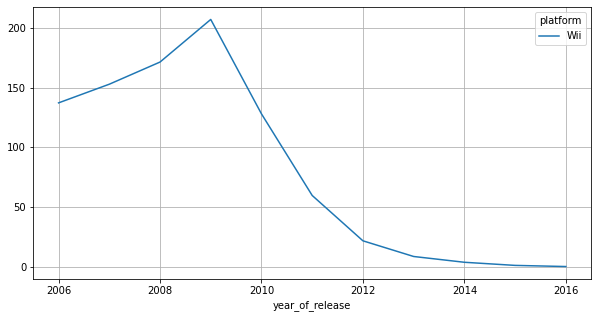

In [17]:
data.query('platform=="Wii"').pivot_table(index='year_of_release',\
    columns='platform', values='sales_all', aggfunc='sum').plot(grid=True, figsize=(10,5));

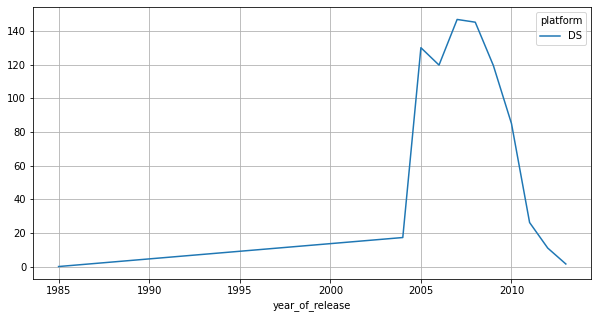

In [18]:
data.query('platform=="DS"').pivot_table(index='year_of_release',\
    columns='platform', values='sales_all', aggfunc='sum').plot(grid=True, figsize=(10,5));

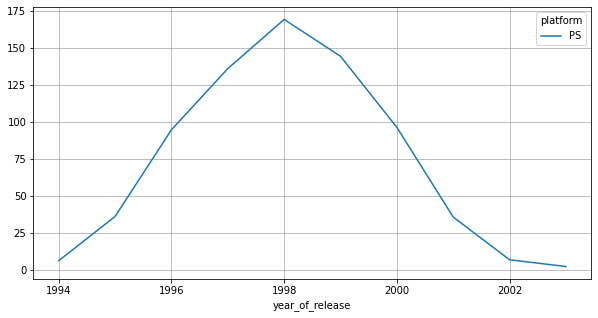

In [19]:
data.query('platform=="PS"').pivot_table(index='year_of_release',\
    columns='platform', values='sales_all', aggfunc='sum').plot(grid=True, figsize=(10,5));

На основе графиков можно сделать вывод, что срок "жизни" платформы в среднем составляет 10-11 лет.
Более-менее равномерное распределение начинается с 2012 года. Будем изучать данные за период 2012-2016 годов.

### Актуальный период. Потенциально прибыльные платформы

In [20]:
#Выясним, на какие платформы продолжают выходить игры за выбранный период
ap = data.loc[data['year_of_release'] >= 2012]
ap['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC',
       'PSV', 'PSP'], dtype=object)

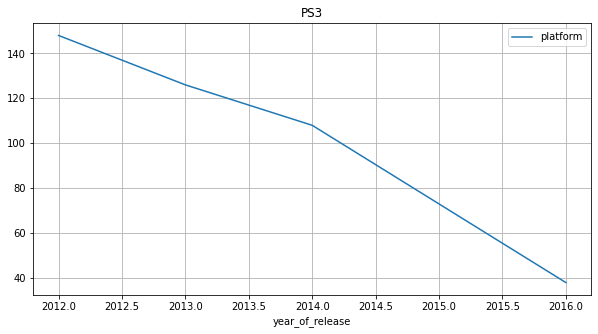

In [21]:
ap.query('platform=="PS3"').pivot_table(index='year_of_release',\
    values='platform', aggfunc='count').plot(grid=True, title='PS3', figsize=(10,5));

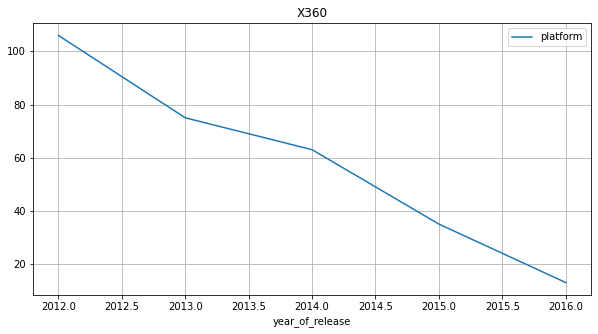

In [22]:
ap.query('platform=="X360"').pivot_table(index='year_of_release',\
    values='platform', aggfunc='count').plot(grid=True, title='X360', figsize=(10,5));

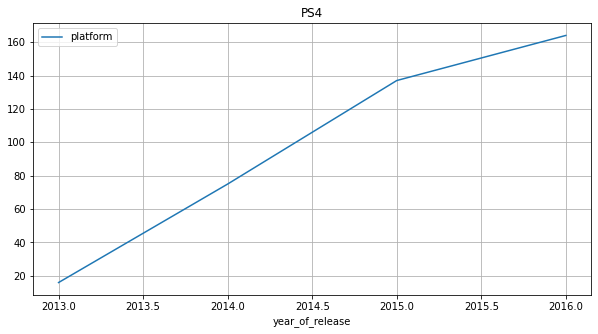

In [23]:
ap.query('platform=="PS4"').pivot_table(index='year_of_release',\
    values='platform', aggfunc='count').plot(grid=True, title='PS4', figsize=(10,5));

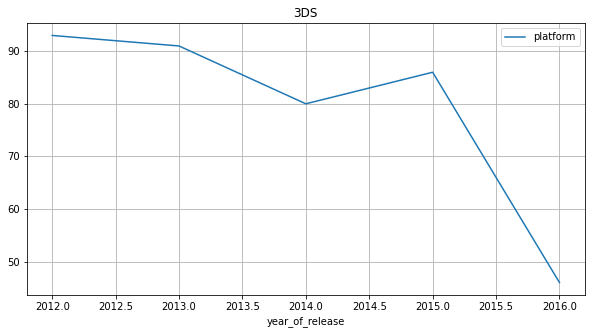

In [24]:
ap.query('platform=="3DS"').pivot_table(index='year_of_release',\
    values='platform', aggfunc='count').plot(grid=True, title='3DS', figsize=(10,5));

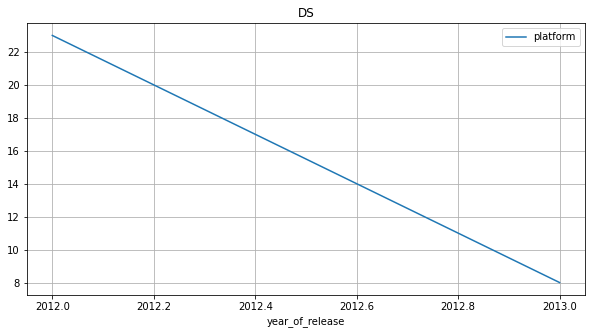

In [25]:
ap.query('platform=="DS"').pivot_table(index='year_of_release',\
    values='platform', aggfunc='count').plot(grid=True, title='DS', figsize=(10,5));

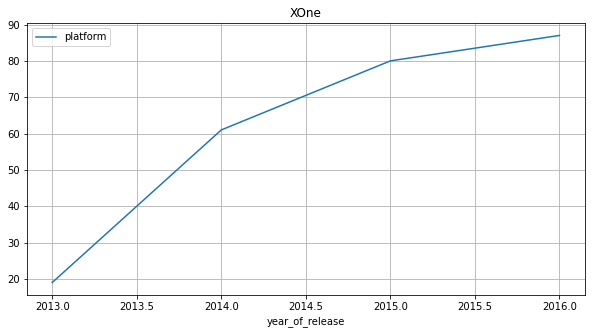

In [26]:
ap.query('platform=="XOne"').pivot_table(index='year_of_release',\
    values='platform', aggfunc='count').plot(grid=True, title='XOne', figsize=(10,5));

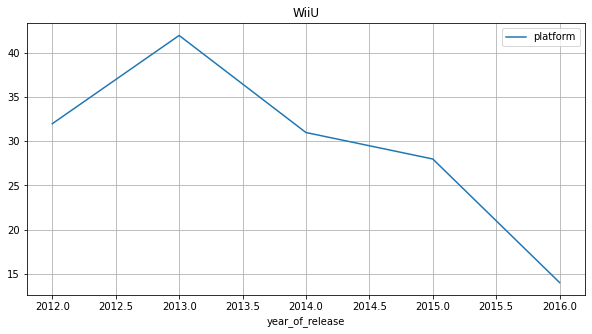

In [27]:
ap.query('platform=="WiiU"').pivot_table(index='year_of_release',\
    values='platform', aggfunc='count').plot(grid=True, title='WiiU', figsize=(10,5));

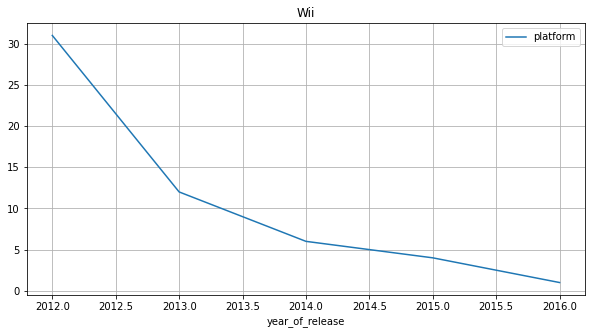

In [28]:
ap.query('platform=="Wii"').pivot_table(index='year_of_release',\
    values='platform', aggfunc='count').plot(grid=True, title='Wii', figsize=(10,5));

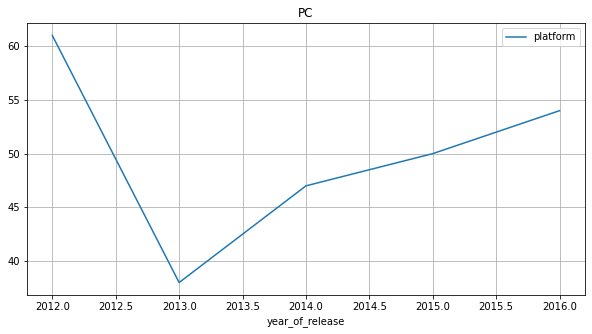

In [29]:
ap.query('platform=="PC"').pivot_table(index='year_of_release',\
    values='platform', aggfunc='count').plot(grid=True, title='PC', figsize=(10,5));

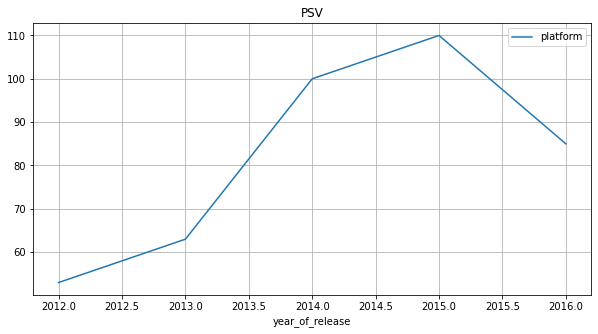

In [30]:
ap.query('platform=="PSV"').pivot_table(index='year_of_release',\
    values='platform', aggfunc='count').plot(grid=True, title='PSV', figsize=(10,5));

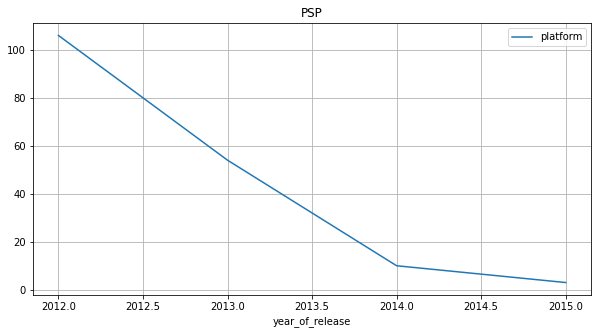

In [31]:
ap.query('platform=="PSP"').pivot_table(index='year_of_release',\
    values='platform', aggfunc='count').plot(grid=True, title='PSP', figsize=(10,5));

Потенциально прибыльные для инвестиций платформы - PS4 и XOne: они достаточно недавно появились и сейчас находятся в стадии развития. Также игры для PC после некоторого спада, с 2013 года демонстрируют рост. Остальные либо уже пришли к упадку, либо на них на данный момент игры не выпускаются.

Посмотрим, по каким платформам было продано больше всего игр и построим график.

In [32]:
sales_global = ap.groupby(['platform']).agg({'sales_all':'sum'})
sales_global.sort_values(by='sales_all', ascending=False)

,sales_all
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


### График глобальных продаж игр в разбивке по платформам

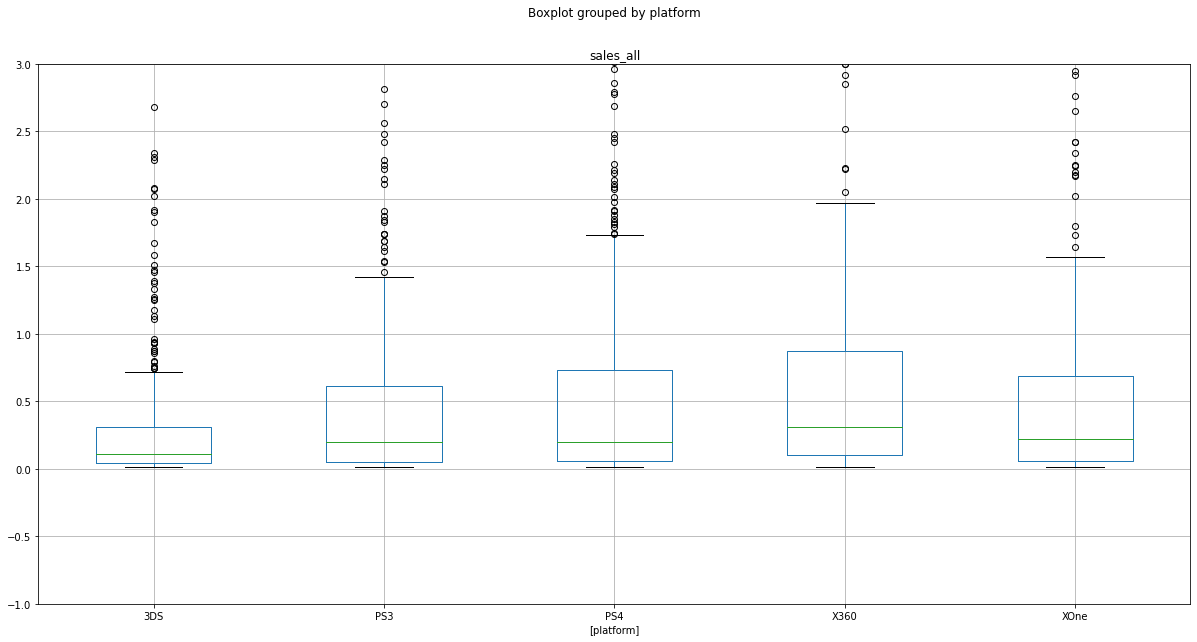

In [33]:
#построим график по 5 самым прибыльным платформам
ap.query('platform=="PS4" or platform=="PS3" or platform=="X360" or platform=="3DS" or platform=="XOne"')\
.boxplot(column=['sales_all'], by = ['platform'], figsize=(20,10));
plt.ylim(-1, 3);

Т.к. мы определили наиболее потенциально прибыльными платформы PS4 и XOne, полезно будет сравнить их с предыдущими версиями (PS3 и X360). Видно, что X360 была прибыльней, чем PS3, за тот же период времени (промежуток "жизни" обеих платформ совпадает). Однако на данный момент PS4 всё же обгоняет XOne по продажам.

###  Влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков

Рассмотрим, как влияют на продажи отзывы пользователей и критиков по PS4. Создадим новую переменную, где удалим пропуски в столбце 'user_score', и приведём их к типу float.

Отзывы пользователей.

Корреляция =  -0.031957110204556376


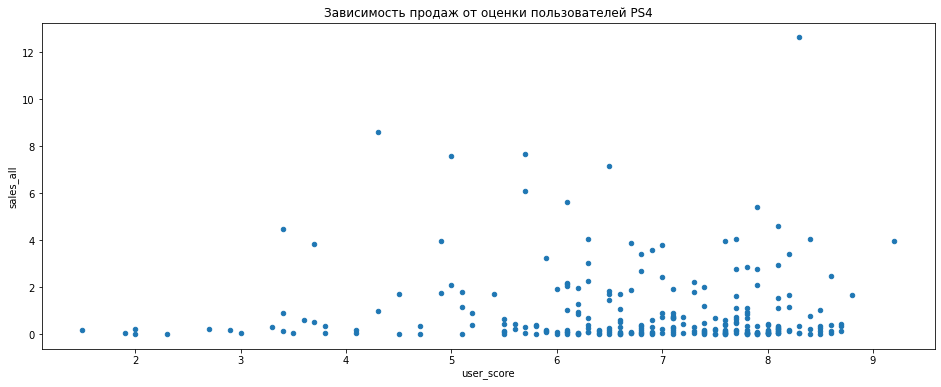

In [34]:
ap_score = ap.dropna(subset=['user_score']).reset_index(drop=True)
ap_score['user_score'] = ap_score['user_score'].astype(float)
ap_score.query('platform=="PS4"').plot(x='user_score', y='sales_all', kind='scatter', figsize=(16,6),\
          title='Зависимость продаж от оценки пользователей PS4');
print('Корреляция = ',\
      ap_score.loc[ap_score['platform']=='PS4', 'user_score']\
      .corr(ap_score.loc[ap_score['platform']=='PS4', 'sales_all']))

Отзывы критиков.

Корреляция =  0.40589480145836687


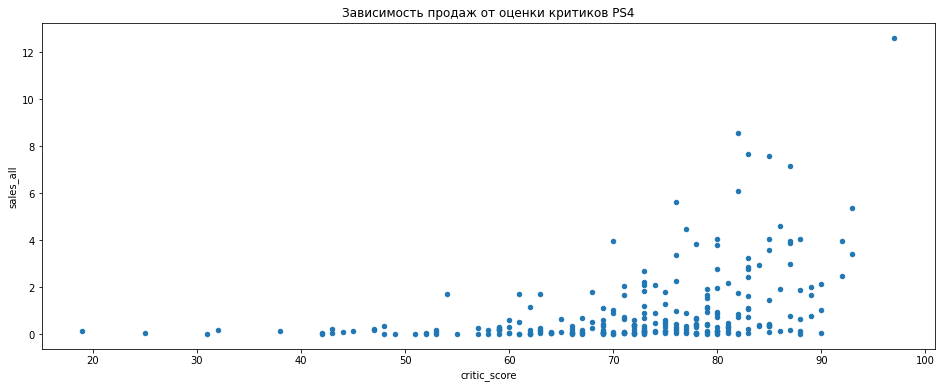

In [35]:
ap_score.query('platform=="PS4"').plot(x='critic_score', y='sales_all', kind='scatter', figsize=(16,6),\
          title='Зависимость продаж от оценки критиков PS4');
print('Корреляция = ',\
      ap_score.loc[ap_score['platform']=='PS4', 'critic_score']\
      .corr(ap_score.loc[ap_score['platform']=='PS4', 'sales_all']))

Можно сделать вывод, что отзывы пользователей почти не влияют на продажу игр, тогда как отзывы критиков оказывают более существенное влияние. Но в обоих случаях корреляция недостаточно высока, чтобы с точностью сделать выводы. К тому же на успех игры влияет множество других факторов (стоимость игры, доступность платформы населению) и оценки пользователей и критиков здесь не самый значимый параметр. Рассмотрим размер корреляции для XOne:

In [36]:
print('Корреляция (оценка пользователей) = ',\
      ap_score.loc[ap_score['platform']=='XOne', 'user_score']\
      .corr(ap_score.loc[ap_score['platform']=='XOne', 'sales_all']))
print('Корреляция (оценка критиков) = ',\
      ap_score.loc[ap_score['platform']=='XOne', 'critic_score']\
      .corr(ap_score.loc[ap_score['platform']=='XOne', 'sales_all']))

Корреляция (оценка пользователей) =  -0.06892505328279414
Корреляция (оценка критиков) =  0.41042203561296375


Результаты примерно такие же. Можно сказать, что это верно и для остальных платформ.

### Распределение игр по жанрам

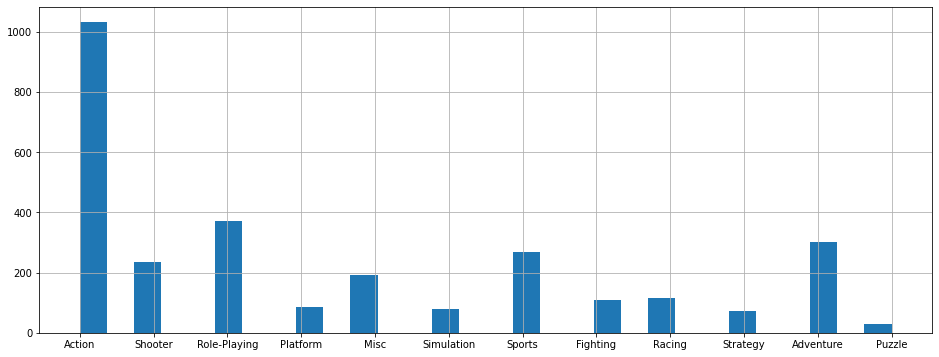

In [37]:
#изучим распределение игр по жанрам
ap['genre'].hist(bins=30, figsize=(16,6));

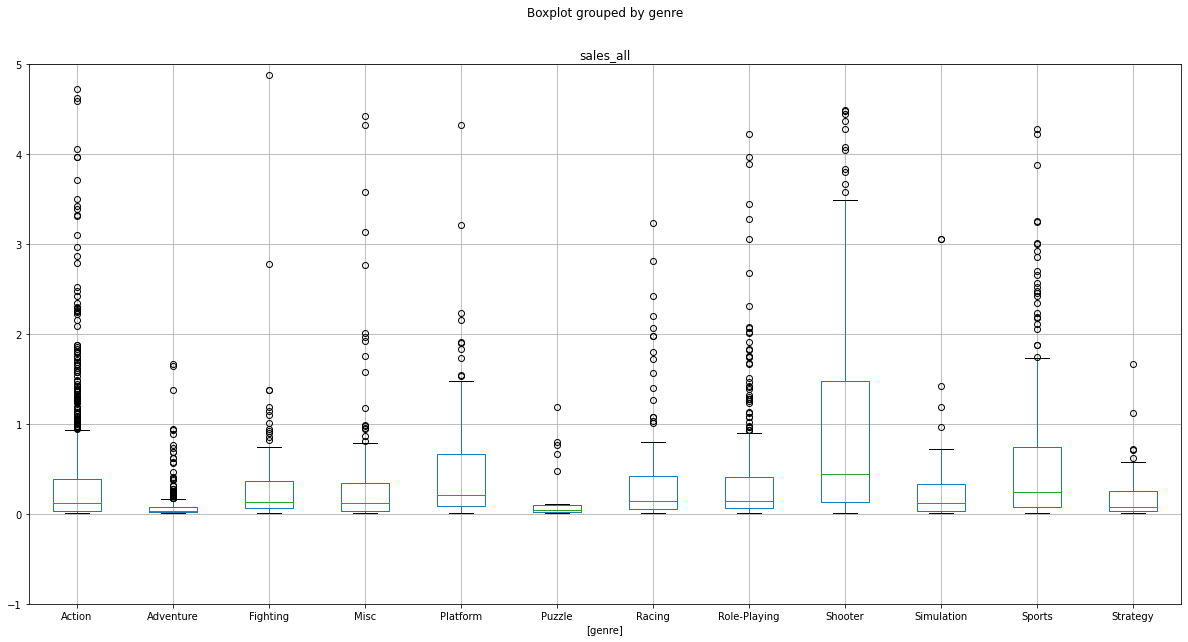

In [38]:
#посмотрим, какие жанры наиболее прибыльны
ap.boxplot(column=['sales_all'], by = ['genre'], figsize=(20,10));
plt.ylim(-1,5);

Игры жанра Action занимают лидирующие позиции по количеству выпускаемых игр (скорее всего, потому что многие игры можно подвести под эту категорию), на втором месте Role-Playing. Самый прибыльный жанр - Shooter, менее прибыльный - Adventure и Puzzle.

## Портрет пользователя каждого региона

### NA

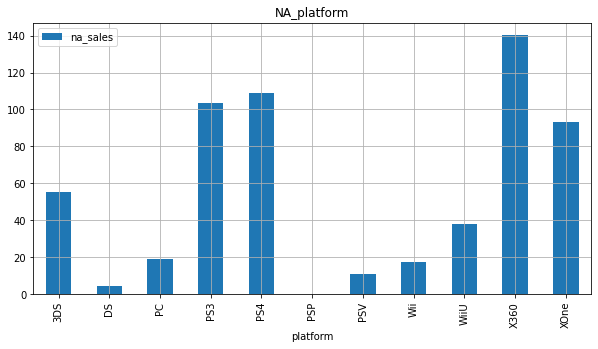

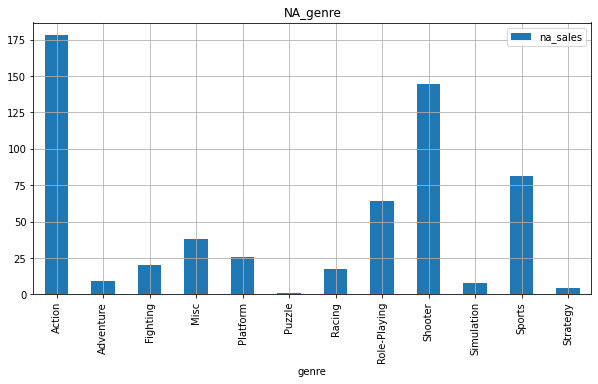

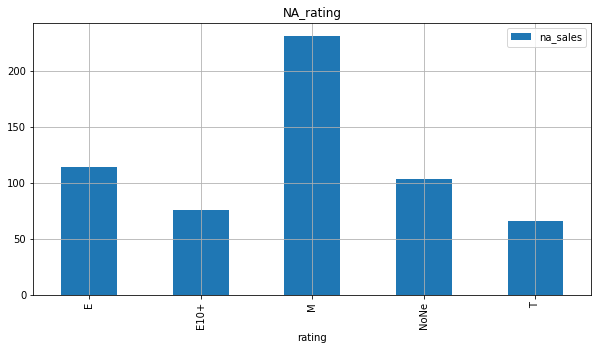

In [39]:
ap.pivot_table(index='platform',\
    values='na_sales', aggfunc='sum').plot(kind='bar', grid=True, title='NA_platform', figsize=(10,5))
ap.pivot_table(index='genre',\
    values='na_sales', aggfunc='sum').plot(kind='bar', grid=True, title='NA_genre', figsize=(10,5))
ap.pivot_table(index='rating',\
    values='na_sales', aggfunc='sum').plot(kind='bar', grid=True, title='NA_rating', figsize=(10,5))
plt.show()

Самые популярные платформы в NA - X360 и XOne, им немного уступают PS3 и PS4. Самые популярные жанры - Action и Shooter(который по сути является разновидностью Action). Можно сказать, что рейтинг ESRB не влияет на продажи: количество продаж с рейтингом 17+ лидирует.

### EU

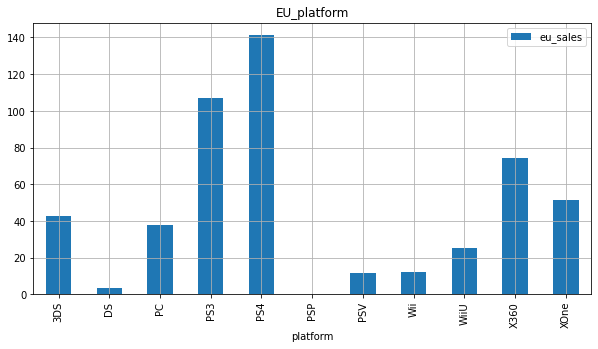

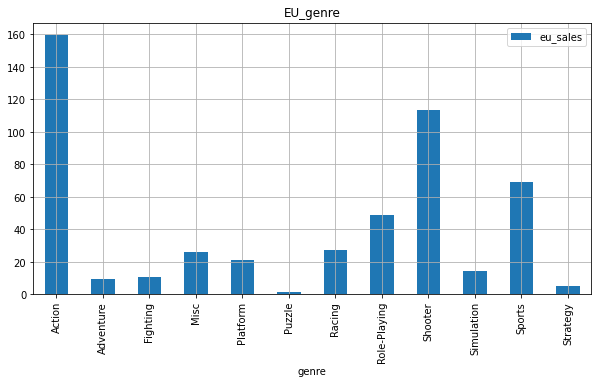

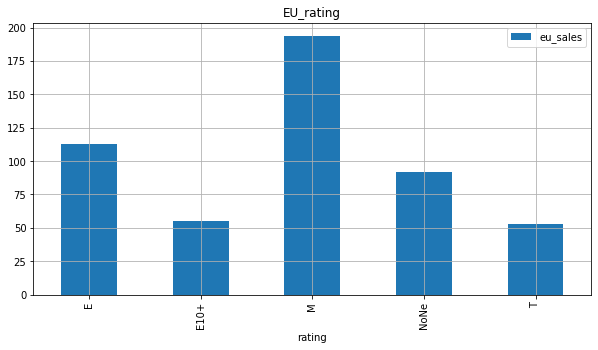

In [40]:
ap.pivot_table(index='platform',\
    values='eu_sales', aggfunc='sum').plot(kind='bar', grid=True, title='EU_platform', figsize=(10,5))
ap.pivot_table(index='genre',\
    values='eu_sales', aggfunc='sum').plot(kind='bar', grid=True, title='EU_genre', figsize=(10,5))
ap.pivot_table(index='rating',\
    values='eu_sales', aggfunc='sum').plot(kind='bar', grid=True, title='EU_rating', figsize=(10,5))
plt.show()

Абсолютными лидерами региона являются PS3 и PS4, им значительно уступают X360, XOne и 3DS. Среди жанров популярны те же Action и Shooter. Также количество продаж с рейтингом 17+ на первом месте.

### JP

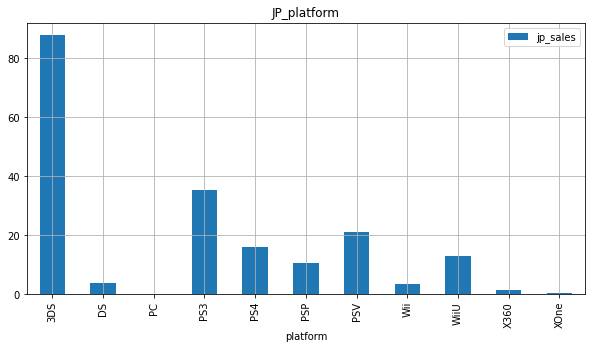

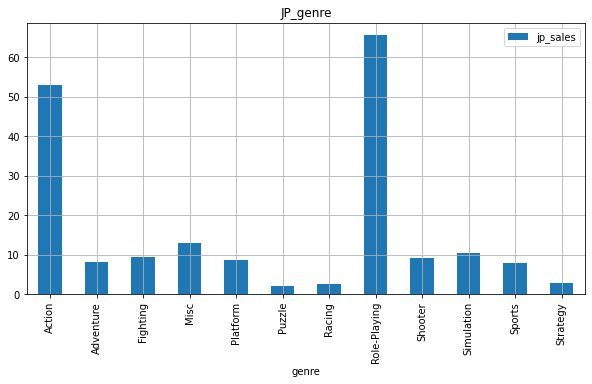

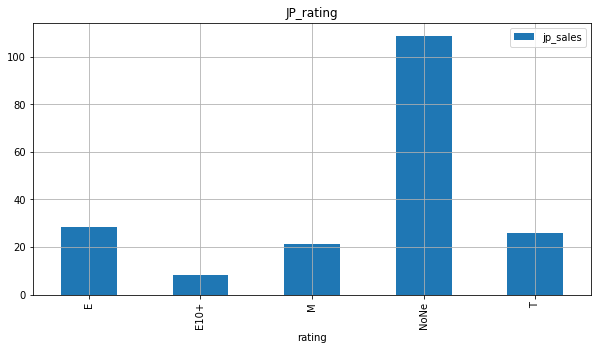

In [41]:
ap.pivot_table(index='platform',\
    values='jp_sales', aggfunc='sum').plot(kind='bar', grid=True, title='JP_platform', figsize=(10,5))
ap.pivot_table(index='genre',\
    values='jp_sales', aggfunc='sum').plot(kind='bar', grid=True, title='JP_genre', figsize=(10,5))
ap.pivot_table(index='rating',\
    values='jp_sales', aggfunc='sum').plot(kind='bar', grid=True, title='JP_rating', figsize=(10,5))
plt.show()

Тут ситуация значительно отличается от двух предыдущих регионов: 3DS - абсолютный лидер среди платформ, PS3, занимающая второе место, сильно уступает в доле рынка, а X360 и XOne совсем не популярны. Жанр Action тоже сдаёт позиции, и Role-Playing занимает первое место. Больше всего игр, которым рейтинг ESRB не присвоен: в Японии своя, более строгая, система возрастной оценки игр. Чтоб попасть на японский рынок, необходимо пройти валидацию по местной рейтинговой системе.

## Проверка гипотез

Т.к. мы проверяем гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, будем использовать метод scipy.stats.ttest_ind: 
1. у нас дано два массива данных
2. Генеральные совокупности не зависят друг от друга
3. Согласно ЦПТ, распределение нормальное, т. к. выборки достаточного размера

### Гипотеза-1
 H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; 
 
 H₁: Средние пользовательские рейтинги платформ Xbox One и PC разные;

Создадим переменные для значений столбца user_score в соответствии с нужной платформой. Возьмём датафрейм ap_score, где уже удалены пропущенные значения. На основании этих выборок проведём тест.

In [42]:
#Оценим распределение и объём выборок
PC = ap_score.loc[ap_score['platform']=='PC', 'user_score']
PC.describe()

count    206.000000
mean       6.428641
std        1.664465
min        1.400000
25%        5.500000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64

In [43]:
XOne = ap_score.loc[ap_score['platform']=='XOne', 'user_score']
XOne.describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [44]:
#Выборки и стандартное отклонение не сильно отличаются, оставим equal_var=True
results = st.ttest_ind(PC, XOne)
alpha = 0.05
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


### Гипотеза-2
H₀: Средние пользовательские рейтинги жанров Action и Sports разные;

H₁: Средние пользовательские рейтинги жанров Action и Sports одинаковые;

Гипотеза-2

H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые;

H₁: Средние пользовательские рейтинги жанров Action и Sports разные;

In [45]:
act = ap_score.loc[ap_score['genre']=='Action', 'user_score']
act.describe()

count    523.000000
mean       6.825048
std        1.374440
min        1.600000
25%        6.250000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [46]:
sports = ap_score.loc[ap_score['genre']=='Sports', 'user_score']
sports.describe()

count    195.000000
mean       5.455897
std        1.738646
min        0.200000
25%        4.300000
50%        5.700000
75%        6.800000
max        8.800000
Name: user_score, dtype: float64

In [47]:
#Выборки отличаются значительно, поэтому обозначим equal_var=False
results_g = st.ttest_ind(act, sports, equal_var=False)
alpha = 0.05
print('p-значение:', results_g.pvalue)

if results_g.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


В первом случае нулевую гипотезу - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - не удалось отвергнуть, во втором случае гипотезу Средние пользовательские рейтинги жанров Action и Sports одинаковые пришлось отвергнуть - жанры экшн и спорт имеют разные средние пользовательские рейтинги.

# Общий вывод

В ходе проекта был проведён анализ данных компьютерных игр за актуальный период - последние 5 лет и сделаны следующие выводы:
1. Наиболее перспективные платформы - Playstation 4 и Xbox One: они достаточно недавно созданы и сейчас находятся в стадии роста и развития; также компьютерные игры начинают снова обретать популярность после спада продаж;
2. Отзывы критиков более выраженно влияют на продажи игр, нежели отзывы пользователей;
3. Больше всего выпускается игр жанра экшн, самый прибыльный жанр - шутер;
4. Страны Северной Америки и Европы примерно похожи по игровым предпочтениям, но в Америке больше предпочитают Xbox, а в Европе - Playstation. Из жанров популярны экшн и шутер и игры с рейтингом "М". На Японском рынке же ситуация совсем иная: здесь предпочитают приставку Nintendo, жанр ролевые игры с рейтингом "Е" и "Т".
5. Проверили две гипотезы и выяснили, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, а средние пользовательские рейтинги жанров Action и Sports разные.